In [3]:
#%matplotlib ipympl
%matplotlib inline
import numpy as np
import Bio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# pymol center of mass calculated for 1uaz_tm.pdb
com_coordinates = [0.186, -0.183, 0.268]

In [5]:
num_pts = 250
# Generate n indices on an evenly distributed interval
indices = np.arange(0, num_pts, dtype=float) + 0.5
golden_angle = np.pi * (3 - np.sqrt(5))
# We need only points on an hemisphere instead of whole sphere.
phi = np.arccos(1 - indices / num_pts)
theta = golden_angle * indices

# Translate the spherical coordinates to cartesian 3D coordinates (x, y, z)
# Set the radius to 100 angstroms to englobe most of proteins
points = np.zeros((num_pts, 3))
points[:, 0] = np.cos(theta) * np.sin(phi)
points[:, 1] = np.sin(theta) * np.sin(phi)
points[:, 2] = np.cos(phi)
points = points * 70

prot_1uaz_points = np.array([[-2.0070, -16.9319, 22.7405],
[1.6620, -15.8479, 22.2735],
[3.0610, -13.4129, 19.6555],
[5.5560, -14.0139, 16.8455],
[8.4480, -11.7299, 16.0045],
[10.9380, -10.3579, 18.4865],
[11.5950, -7.2829, 20.6065],
[14.6500, -6.1599, 18.6075],
[14.7030, -2.9749, 20.6745],
[13.6490, -4.2469, 24.0795],
[10.7540, -1.8029, 24.1035],
[7.9120, -4.2999, 24.5735],
[8.0090, -7.6909, 19.1125],
[12.6010, -7.1209, 7.5685],
[15.3110, -4.3249, 4.8195],
[13.0760, -5.6069, 2.0305],
[14.9820, -0.7629, 0.5355],
[16.3260, -3.8649, -1.2635],
[17.4570, 0.4621, -4.7865],
[17.0550, -2.5489, -6.9715],
[17.4350, 2.4061, -8.9685],
[20.3340, 0.2181, -9.9985],
[18.1940, -1.2479, -12.7975],
[19.7680, 4.1441, -14.7815],
[20.8440, 2.8941, -18.1725],
[18.0940, 5.5601, -22.8015],
[14.3130, 5.7931, -23.1315],
[12.0690, 8.5291, -21.7145],
[8.7430, 6.7351, -21.2875],
[12.2510, 6.3771, -17.2855],
[9.0270, 8.0741, -16.2905],
[10.7770, 7.5731, -11.3285],
[9.2890, 6.2341, -4.8765],
[11.1180, 5.4731, 5.0925],
[12.1740, 2.5441, 9.3555],
[11.9430, 3.0421, 15.9185],
[8.4390, 3.7711, 17.1285],
[8.1250, 7.0541, 15.3075],
[-1.8130, 5.2261, 21.4105],
[-7.8260, 4.9591, 23.4415],
[-12.8410, 2.1581, 25.9835],
[-10.9420, 0.3731, 28.7065],
[-8.2750, -0.7429, 26.1695],
[-5.2730, 1.0241, 24.6495],
[-0.9840, 0.7251, 19.5595],
[-0.1440, 5.8601, 11.9195],
[1.1210, 8.5421, 5.6565],
[-1.3650, 8.2011, 1.2855],
[1.6070, 8.6231, -1.0055],
[-3.1300, 6.8831, -20.7295],
[-7.2160, 12.3291, -19.0385],
[-6.3750, 14.0911, -15.7775],
[-10.0930, 14.1791, -15.0395],
[-9.7820, 10.4341, -14.5225],
[-7.6070, 13.3431, -10.5385],
[-10.6110, 11.2231, -9.6765],
[-8.8980, 11.6741, -5.2775],
[-10.0010, 9.7211, 0.5065],
[-7.3740, 9.5301, 5.0035],
[-9.7920, 8.6361, 10.8345],
[-7.7610, 7.1961, 15.6495],
[-12.5340, 6.3201, 20.0745],
[-15.8810, 4.6481, 19.4875],
[-15.9850, 0.9991, 18.3645],
[-18.9740, 1.9791, 16.2595],
[-16.1650, 0.4001, 12.1065],
[-18.1530, 3.1201, 10.4055],
[-15.1280, 4.8211, 8.9165],
[-16.7850, 0.7661, 6.0265],
[-16.5540, 4.1031, 4.2485],
[-16.5320, 1.4981, -0.1885],
[-14.3370, -0.4269, -4.2115],
[-14.8870, 2.7291, -6.2045],
[-14.1990, -0.2949, -9.7485],
[-11.4530, -2.8389, -13.7735],
[-13.8080, -1.0039, -16.1395],
[-13.0100, 2.5151, -17.2275],
[-9.1930, -1.9149, -17.8125],
[-10.7090, -1.2539, -21.2365],
[-7.1160, -2.7669, -23.9335],
[-7.5760, -0.2999, -26.7635],
[-3.8220, 0.1451, -26.5615],
[-1.2810, -2.6109, -27.3005],
[-2.1840, -6.2149, -26.3035],
[1.1230, -6.2159, -24.5565],
[-1.4970, -8.1539, -21.1005],
[-1.7890, -8.4609, -14.8385],
[-5.2810, -8.4849, -11.0555],
[-7.2980, -6.2969, -6.5665],
[-6.1930, -9.4189, -4.7225],
[-8.7140, -6.1679, -0.9035],
[-6.8370, -8.0459, 1.8055],
[-9.9690, -7.4039, 6.2225],
[-9.5450, -8.5169, 12.6035],
[-10.5770, -3.5929, 14.6805],
[-11.9010, -6.7979, 16.2725],
[-8.5340, -7.6619, 17.7775],
[-8.8850, -11.3409, 17.0265],
[-2.2710, -9.9939, 17.5395],
[1.0190, -10.0639, 7.1115],
[4.1650, -9.1739, 3.2425],
[4.2540, -7.6989, -2.5575],
[6.3550, -7.2909, -6.5005],
[9.1130, -5.5729, -10.5555],
[6.3090, -6.9599, -12.7345],
[10.3240, -6.1519, -16.2745],
[7.8050, -4.2509, -22.3965],
[8.4490, 1.3401, -23.4485]])

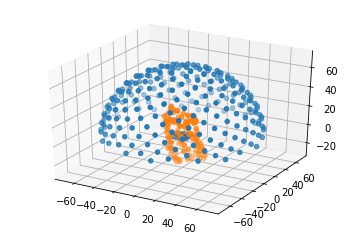

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])
ax.scatter(prot_1uaz_points[:,0], prot_1uaz_points[:,1], prot_1uaz_points[:,2])
ax.plot_surface(X, Y, Z)
plt.show()

[ 1.4  1.5  2.4]


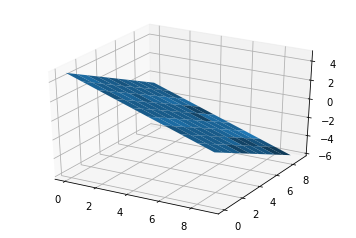

In [36]:
point  = np.array([1, 2, 3])
normal = np.array([1.4, 1.5, 2.4])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)
print(normal)
# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.show()

In [22]:
xx

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [23]:
yy

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

In [24]:
z

array([[ 4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. ],
       [ 4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5],
       [ 3.5,  3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. ],
       [ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5],
       [ 2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ],
       [ 2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5],
       [ 1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. ],
       [ 1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. , -3.5],
       [ 0.5,  0. , -0.5, -1. , -1.5, -2. , -2.5, -3. , -3.5, -4. ],
       [ 0. , -0.5, -1. , -1.5, -2. , -2.5, -3. , -3.5, -4. , -4.5]])

In [26]:
xx[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
X, Y = np.meshgrid(range(10), range(10))
positions = np.vstack([X.ravel(), Y.ravel()])

In [33]:
positions

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])